## Installing some libraries

In [69]:
!pip install tensorflow

## Importing required libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
np.warnings.filterwarnings('ignore')

In [6]:
#loading and reading the dataset
df= pd.read_csv(r"C:\Users\INTEL\Desktop\Projects\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
#checking dimensions
df.shape

(1470, 35)

Given dataset contains 1470 rows and 35 columns

In [8]:
#to check datatypes of the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The dataset contains integer and the object datatype.

In [9]:
#to check all the columns of the given dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
#knowing summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Contains no null values. 1470 entries. Also contains 26 integer datatypes and 9 object datatypes.

In [11]:
#knowing statistical summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We can drop these column, as they are just some indicators

EmployeeCount

EmployeeNumber

StandardHours

In [12]:
#dropping 3 columns
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

Attrition is the target column

Obtain a count plot of the column

In [13]:
#setting target column
target = 'Attrition'

## EDA

<AxesSubplot:xlabel='Attrition', ylabel='count'>

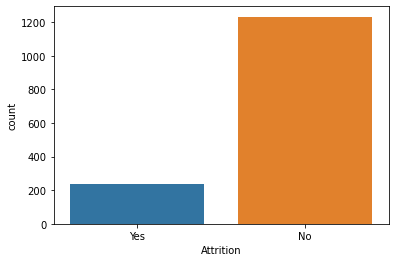

In [14]:
#visualisation of target column by using countplot method
sns.countplot(x=target, data=df)

From the countplot it can be observed that the target is imbalanced.

Later in this notebook, we will alter it.

Now check if any features contains null values

In [15]:
#checking null values df.isnull().sum()

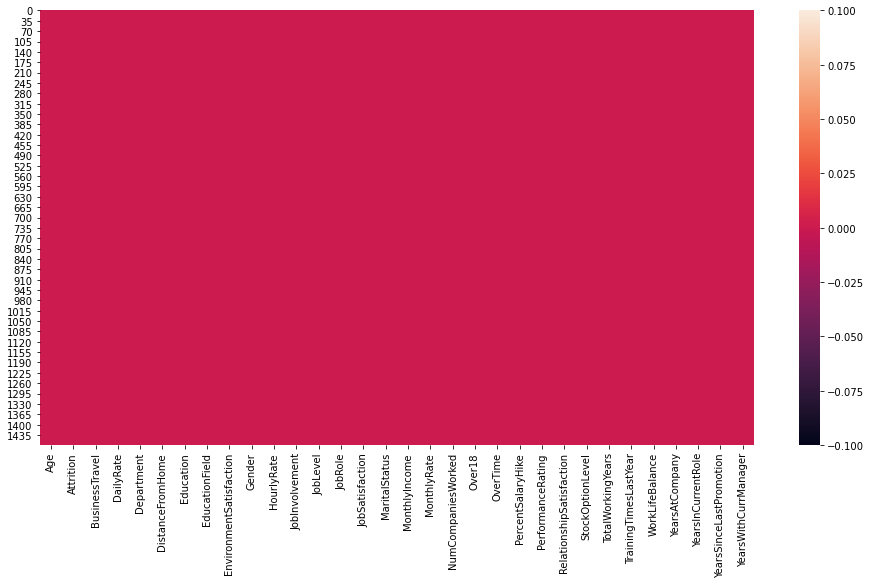

In [16]:
#another way to check missing values
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())
plt.show()                  #visualizing null values using heatmap

So from the above series it can be concluded that there are no missing values

#### Now it's time to do some data vizs
We will start with category variables

In [17]:
# Categorical Variables

cat_vars = [var for var in df.columns if df[var].dtype == 'O' and var != target]

# There are few other categorical features which are not by default
# We will analyze those variables also
xtra_vars = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel' ,'JobSatisfaction',
             'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked',
             'StockOptionLevel', 'PercentSalaryHike', 'TrainingTimesLastYear']


cat_vars = cat_vars + xtra_vars

In [18]:
cat_vars

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'PercentSalaryHike',
 'TrainingTimesLastYear']

In [19]:
def plot_cat(var, dataframe):
    plt.figure(figsize=(16, 4))
    sns.countplot(x=var, hue=target, data=dataframe)
    plt.show()

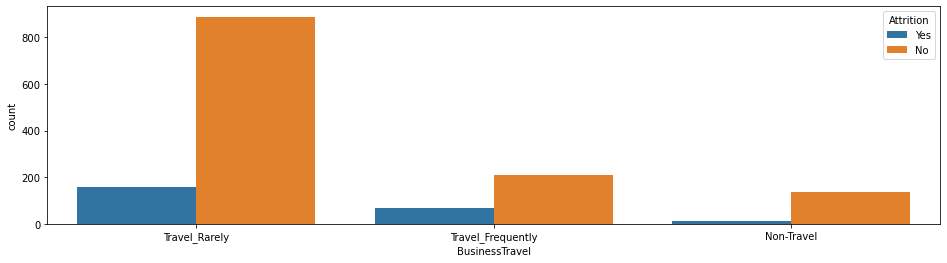

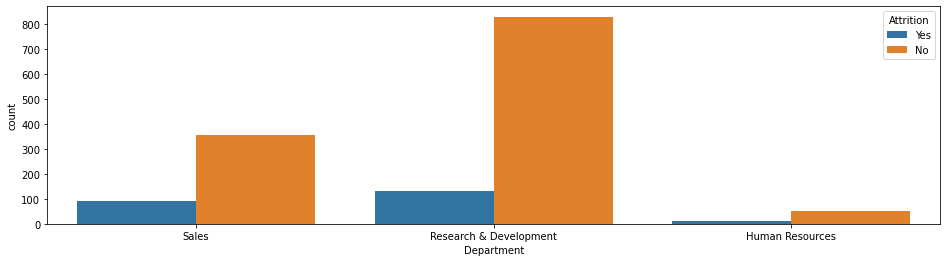

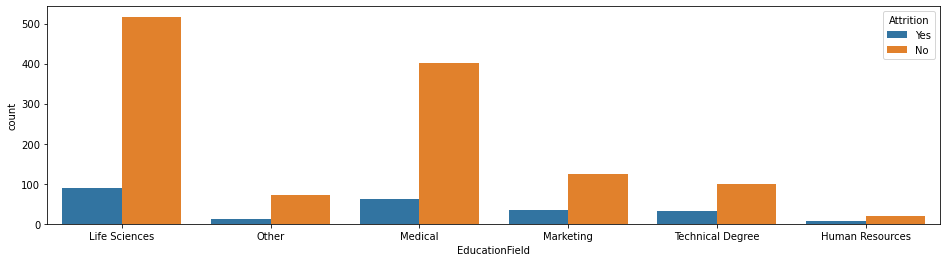

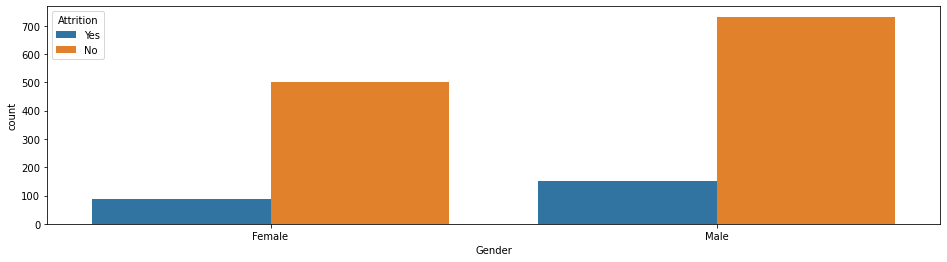

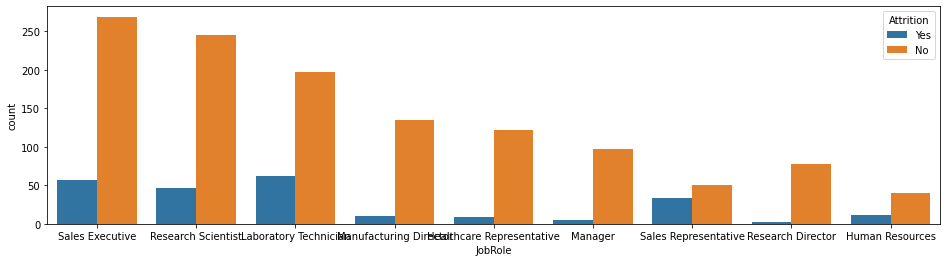

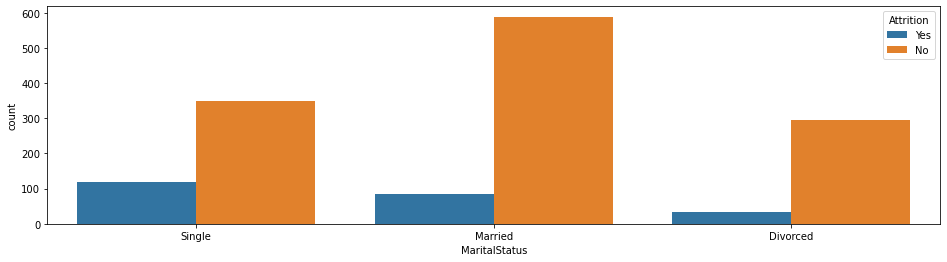

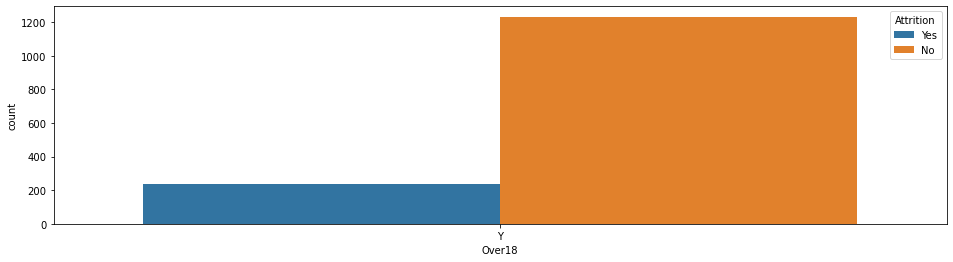

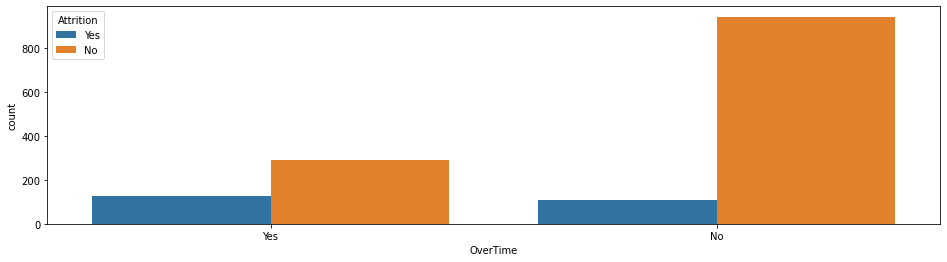

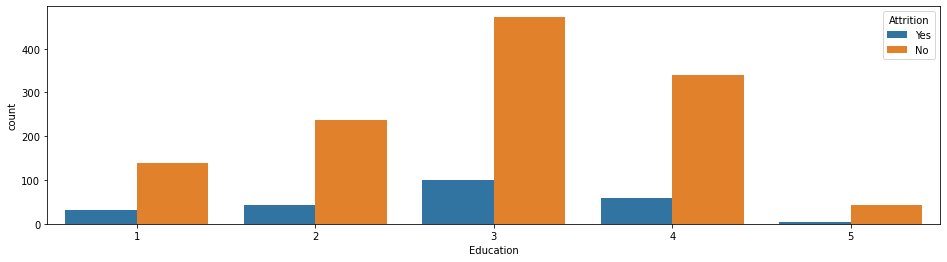

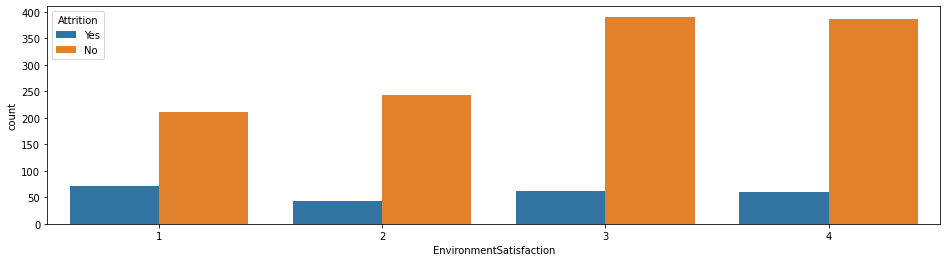

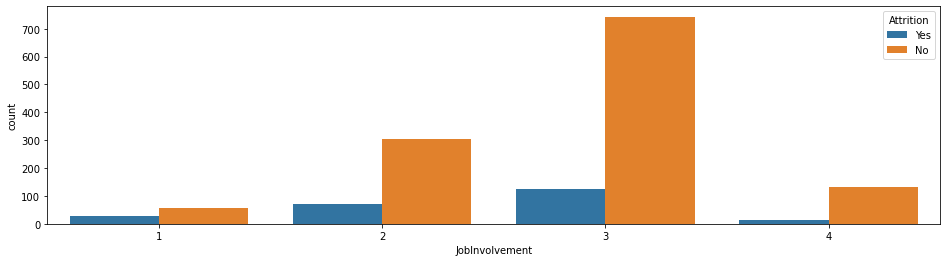

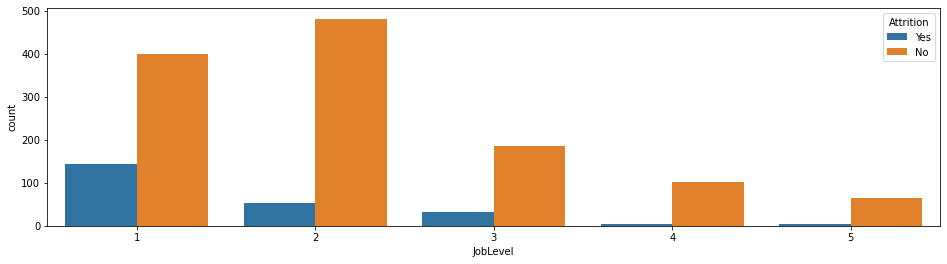

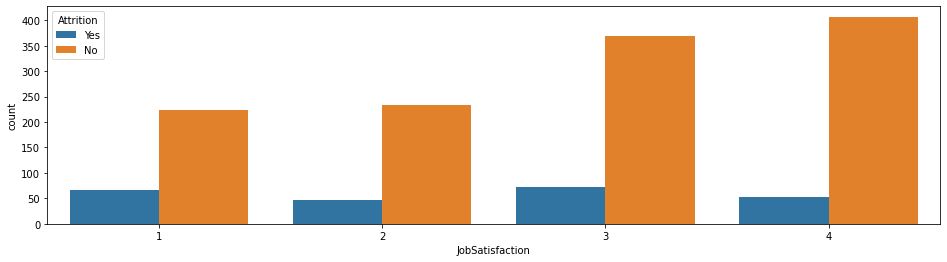

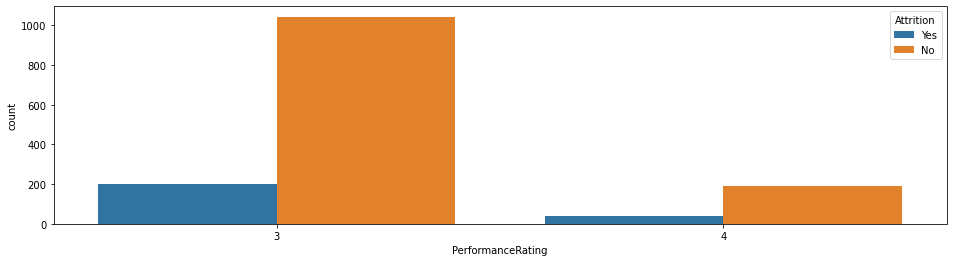

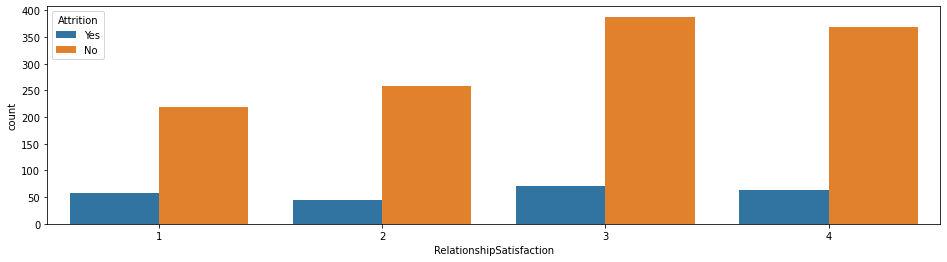

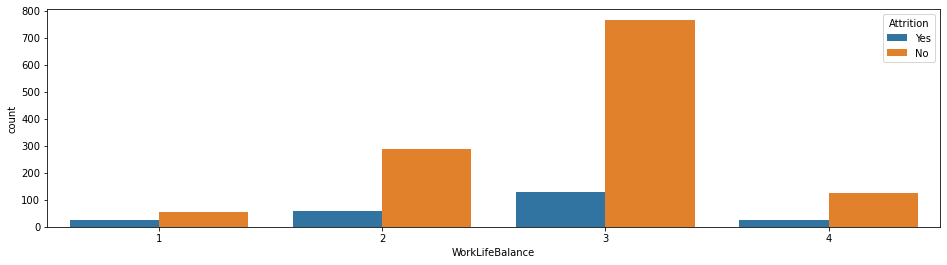

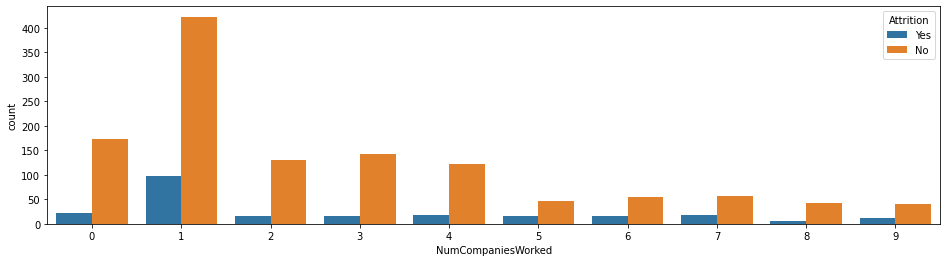

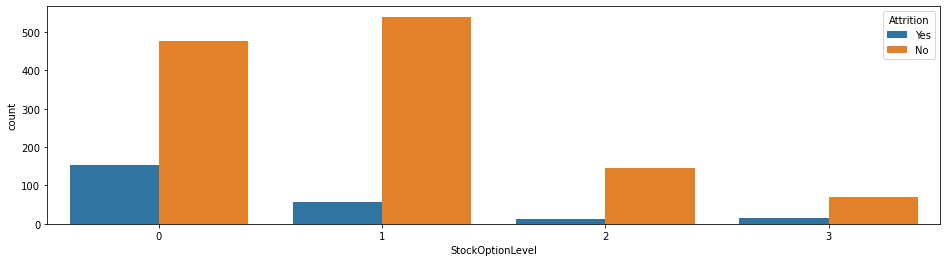

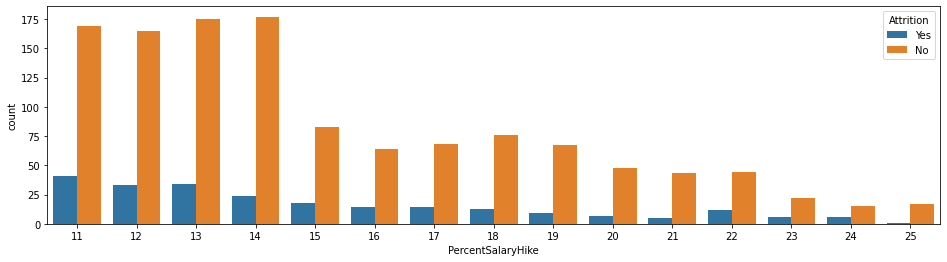

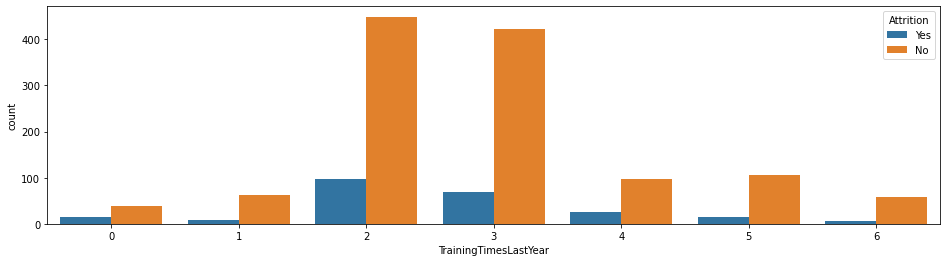

In [20]:
#visualisation of cat_vars by using countplot 
for i in cat_vars:
    plot_cat(i, df)

### Let's plot a percentage plot to check what percent of employees
### left at each features

In [21]:
#defining and grouping
def plot_cat_percent(var, dataframe):
    plt.figure(figsize=(16, 4))
    ys_df = df[df[target] == 'Yes'].groupby(var).count()[target]
    no_df = df[df[target] == 'No'].groupby(var).count()[target]
    rat = ys_df / (ys_df + no_df) * 100
    rat.plot(kind='bar')
    plt.show()

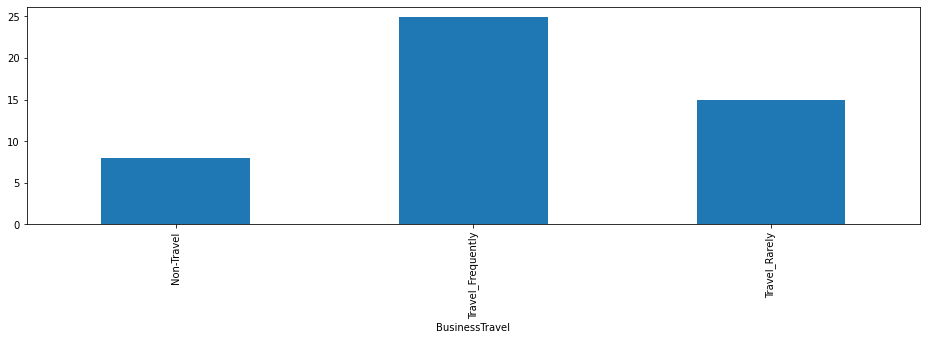

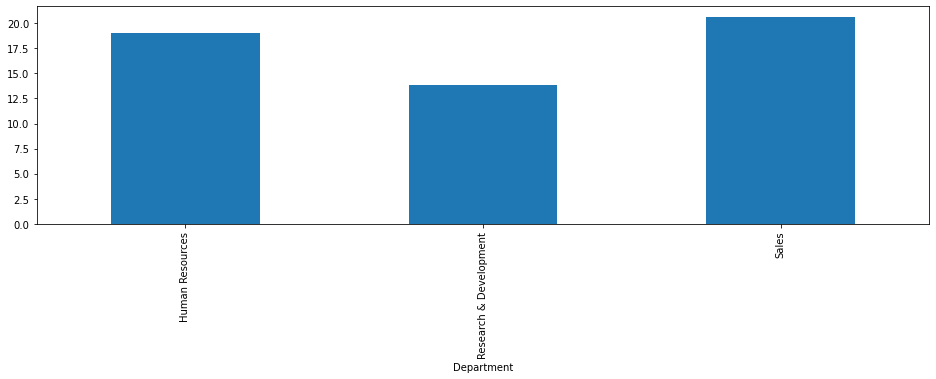

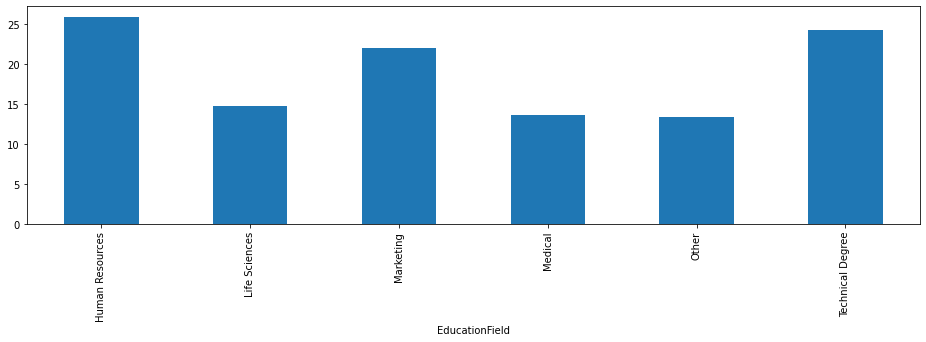

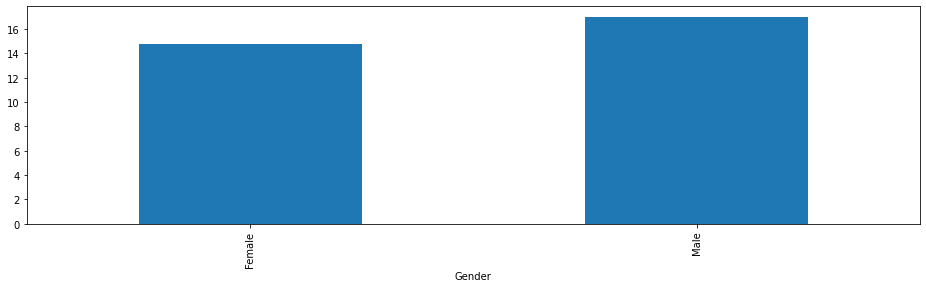

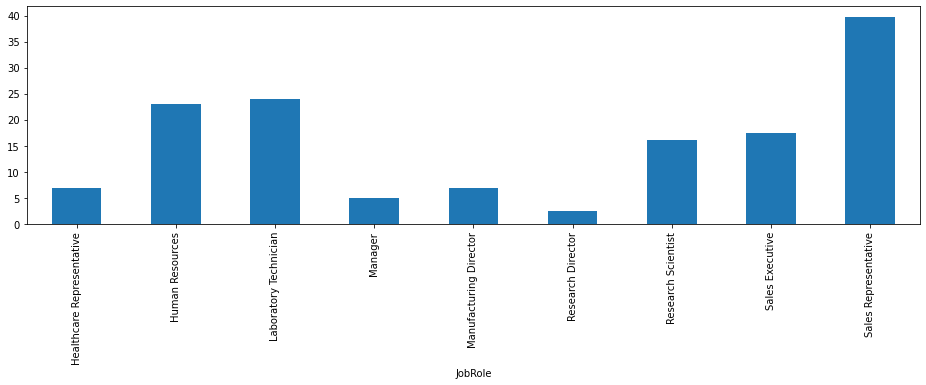

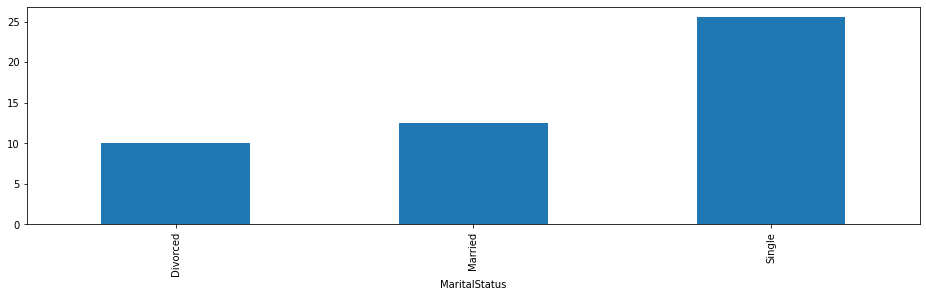

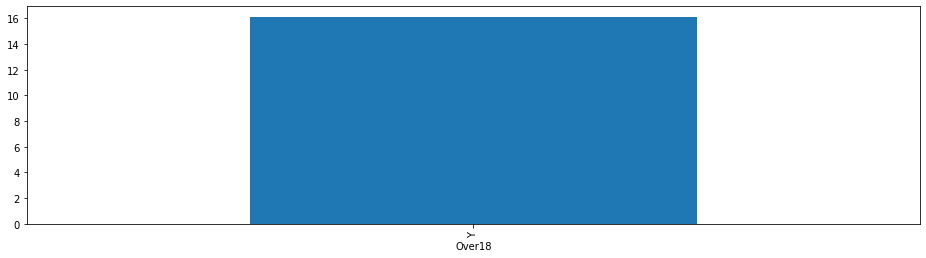

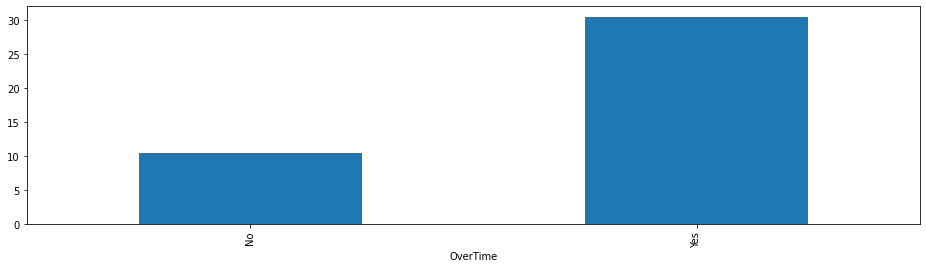

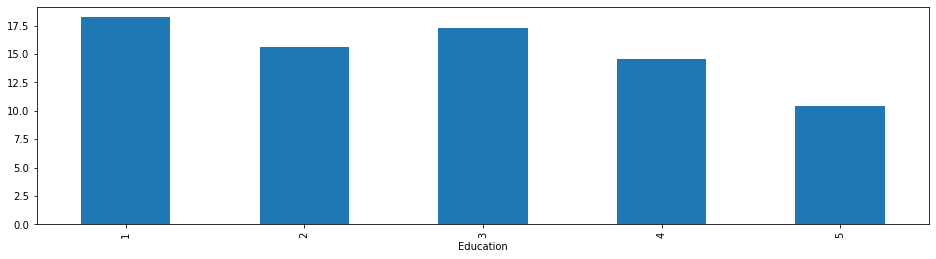

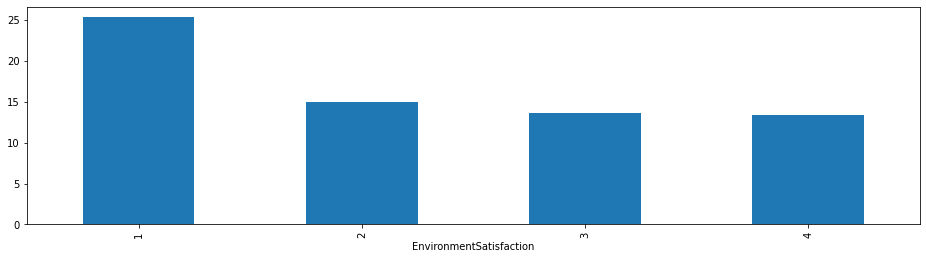

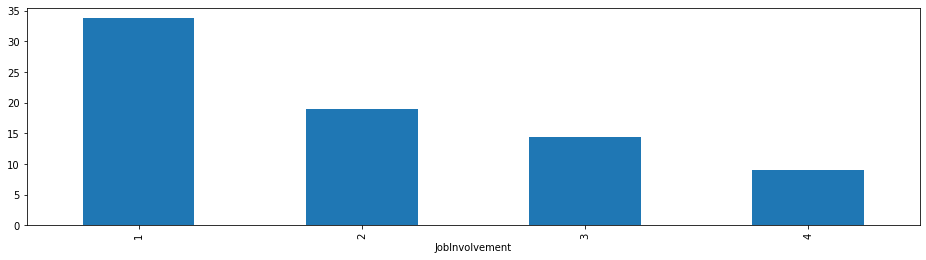

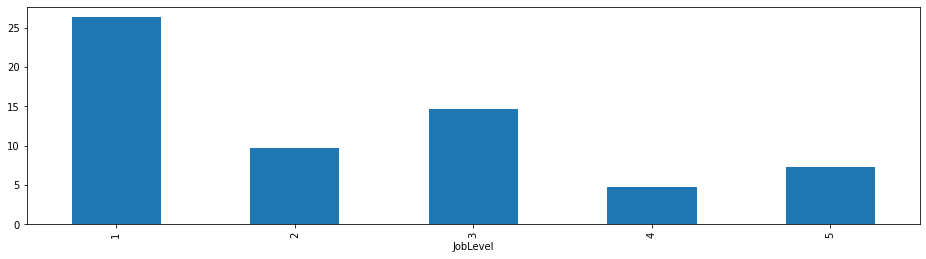

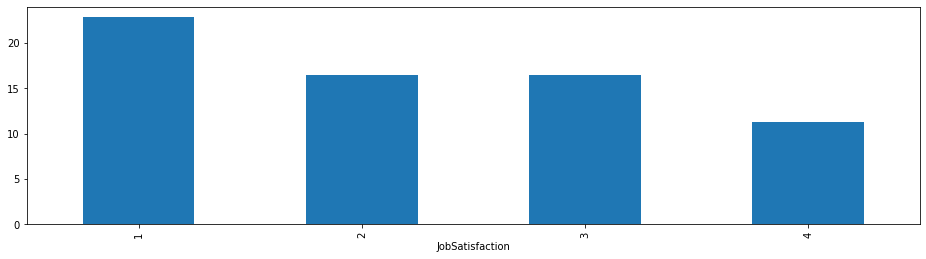

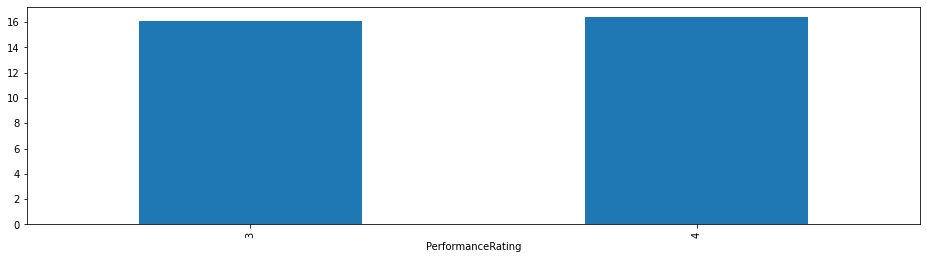

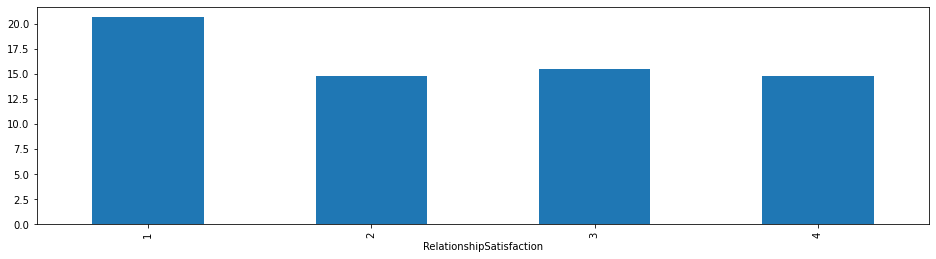

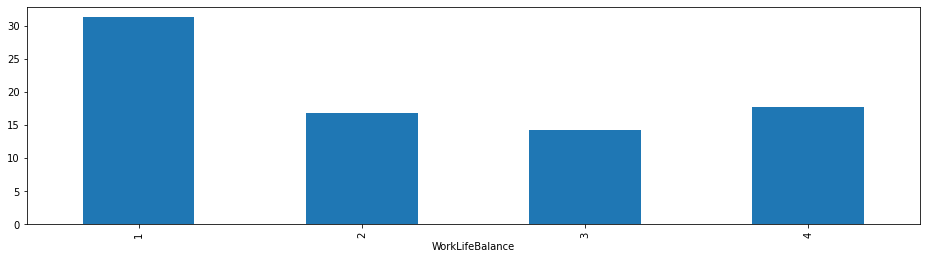

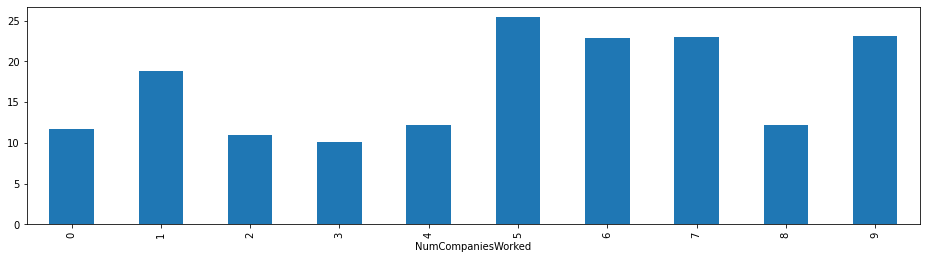

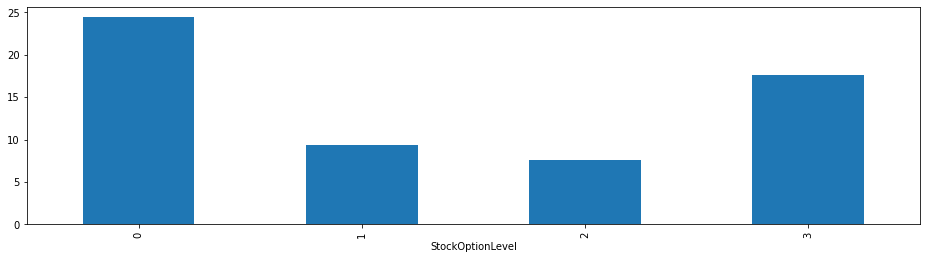

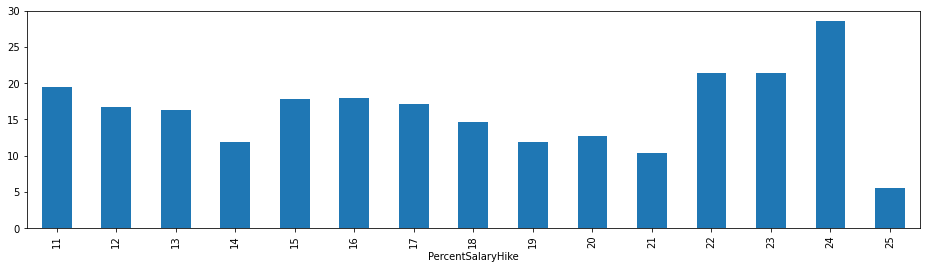

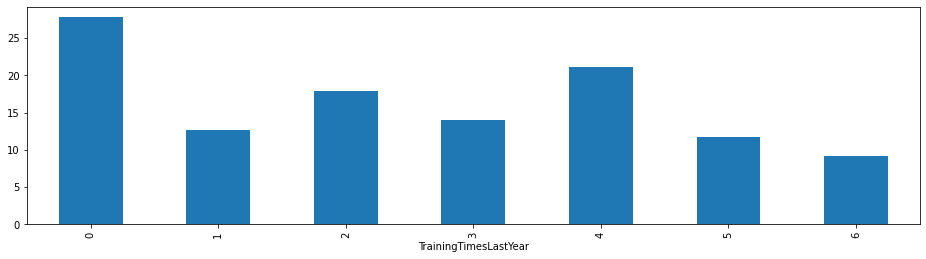

In [22]:
#visualisation by using countplot method after grouping
for i in cat_vars:
    plot_cat_percent(i, df)

These columns are not thatmuch contributing to the attrition rate

### Gender, Over18, PerformanceRating

In those features ratio of employees leaving are almost the same, So we can drop those columns

## Numerical Variables

In [23]:
num_vars = [var for var in df.columns if var not in cat_vars and var!=target]

In [24]:
num_vars

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

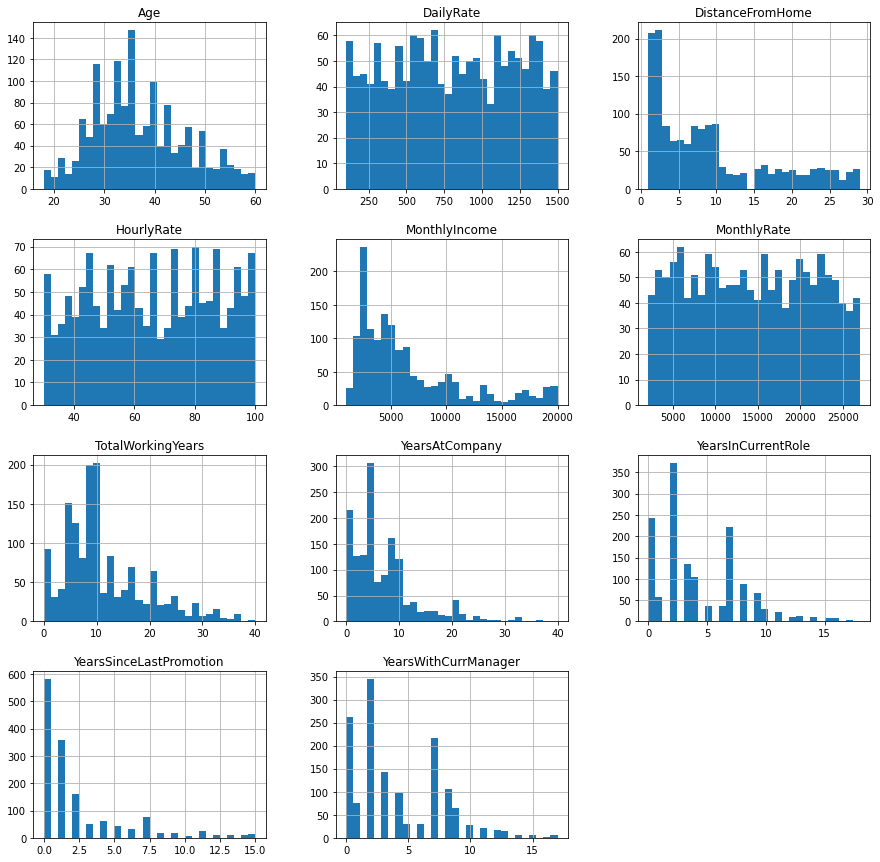

In [25]:
#visualisation by using histogram
df[num_vars].hist(bins=30, figsize=(15,15))
plt.show()

## Boxplot

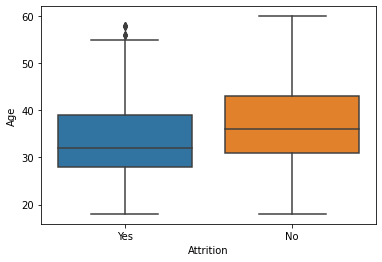

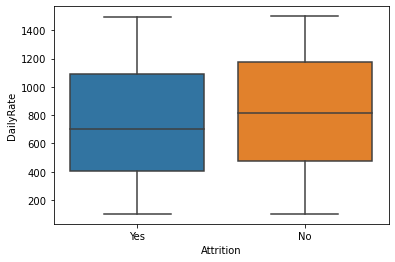

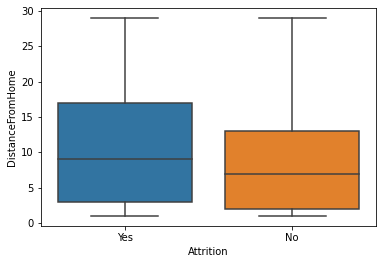

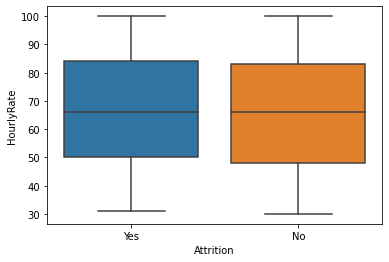

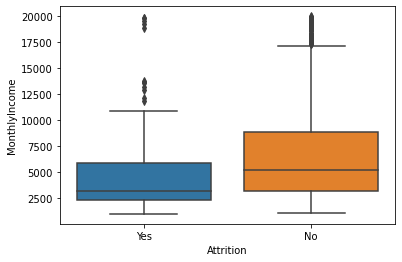

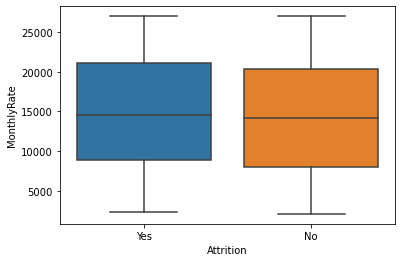

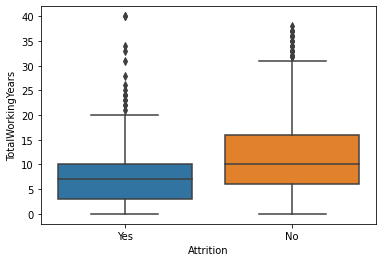

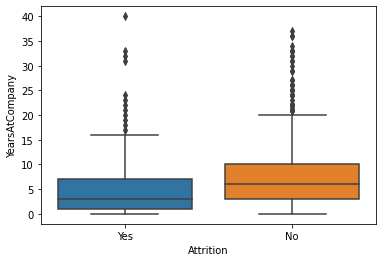

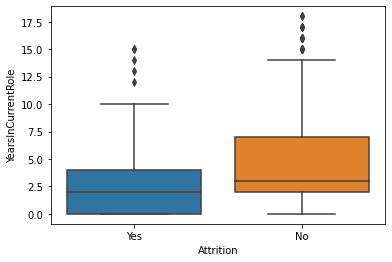

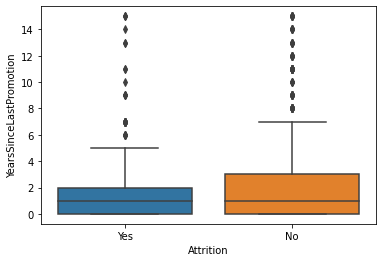

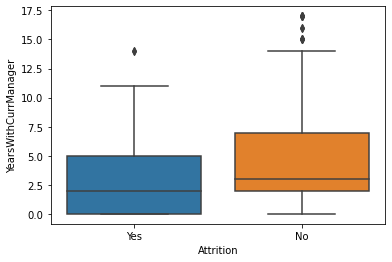

In [26]:
#boxplot to check whether there is any outliers or not
for i in num_vars:
    sns.boxplot(x=target, y=i, data=df)
    plt.show()

In [27]:
#grouping and viewing statistical summary
df[num_vars + [target]].groupby(target).describe()

Age                                                   DailyRate  \
            count       mean      std   min   25%   50%   75%   max     count   
Attrition                                                                       
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0    1233.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0     237.0   

                       ... YearsSinceLastPromotion       YearsWithCurrManager  \
                 mean  ...                     75%   max                count   
Attrition              ...                                                      
No         812.504461  ...                     3.0  15.0               1233.0   
Yes        750.362869  ...                     2.0  15.0                237.0   

                                                         
               mean       std  min  25%  50%  75%   max  
Attrition                                                
No         4.367397  3.594116  0.0  2.0  3.0  7.0  17.0  
Yes        2.852321  3.143349  0.0  0.0  2.0  5.0  14.0  

[2 rows x 88 columns]

#### HourlyRate, MonthlyRate, YearsSinceLastPromotion are not significant features here

In [28]:
#removing some features 
num_vars.remove('HourlyRate')
num_vars.remove('MonthlyRate')
num_vars.remove('YearsSinceLastPromotion')

## Correlation

In [29]:
#viewing correlation of the given dataset
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

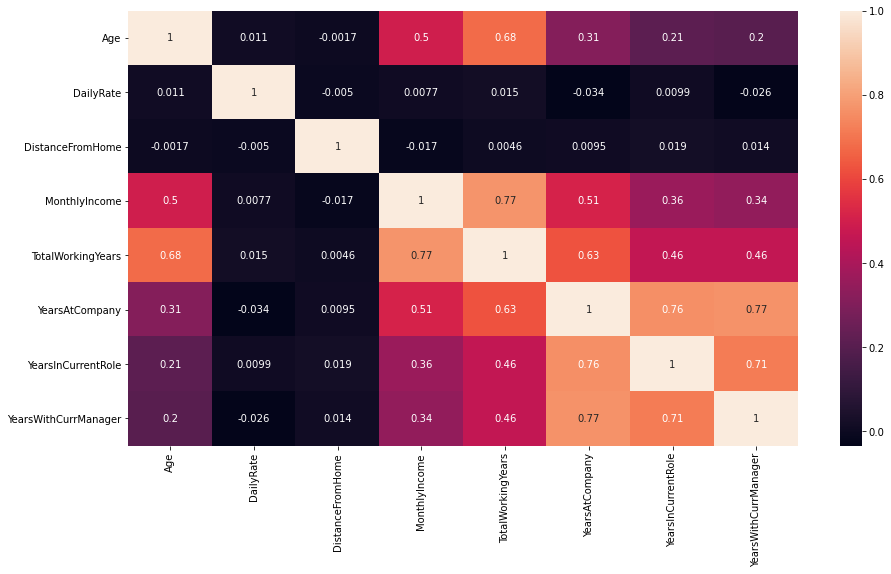

In [30]:
#visualisation of correlation by using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df[num_vars].corr(), annot=True)

From the heatmap it can be observed that there are some mutually correlated features

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

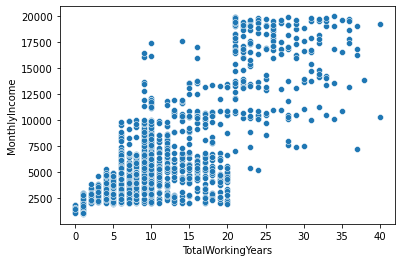

In [31]:
#visualisation by using scatterplot 'total woking years' on x axis and 'monthly income' on y axis
sns.scatterplot(x=df['TotalWorkingYears'], y=df['MonthlyIncome'])              #binary variant

Its predictable, since more the experience more the salary

<AxesSubplot:xlabel='Age', ylabel='TotalWorkingYears'>

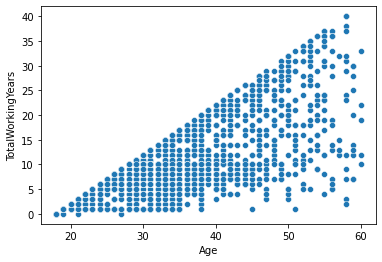

In [32]:
#visualisation by using scatterplot 'total working years' on y axis and 'age' on x axis
sns.scatterplot(y=df['TotalWorkingYears'], x=df['Age'])        #binary variant

Same inference as above

<AxesSubplot:xlabel='YearsAtCompany', ylabel='TotalWorkingYears'>

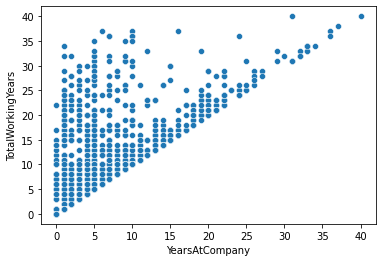

In [33]:
#visualisation by using scatterplot 'years at company' on x axis and 'total working years' on y axis
sns.scatterplot(x=df['YearsAtCompany'], y=df['TotalWorkingYears'])          #binary variant

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='YearsInCurrentRole'>

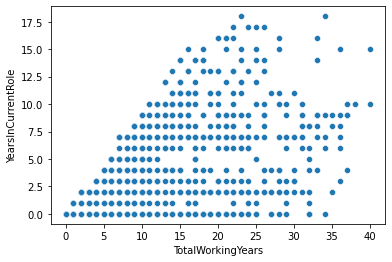

In [34]:
#visualisation by using scatterplot 'years in current role' on y axis and 'total working years' on x axis
sns.scatterplot(y=df['YearsInCurrentRole'], x=df['TotalWorkingYears'])             #binary variant

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='YearsWithCurrManager'>

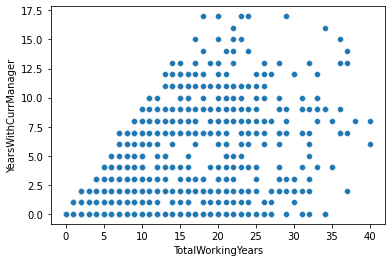

In [35]:
#visualisation by using scatterplot 'years with curr manager' on y axis and 'total working years' on x axis
sns.scatterplot(y=df['YearsWithCurrManager'], x=df['TotalWorkingYears'])

We can remove age from the features set, because age is correlated with working years.

In [36]:
#removing age column
num_vars.remove('Age')

In [37]:
#removing some other columns
cat_vars.remove('Gender')
cat_vars.remove('Over18')
cat_vars.remove('PerformanceRating')

In [38]:
#view columns
num_vars

['DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [39]:
# selected features
fqs = num_vars + cat_vars + [target]

In [40]:
#checking lengths
print(len(fqs), len(df.columns))

25 32


In [41]:
df = df[fqs]

Now we will encode various categories

We will encode OverTime, Attrition with OrdinalEncoder, and remaining with One Hot Encoder

In [42]:
#applying fit transform method
enc = OrdinalEncoder()
oc_data = enc.fit_transform(df[['OverTime','Attrition']].values)

In [43]:
# Drop those mentioned columns and replace them with oc_data
ord_cols = ['OverTime','Attrition']
oc_df = pd.DataFrame(oc_data, columns=ord_cols)
df = df.drop(columns=ord_cols)
df = pd.concat([df, oc_df], axis=1)

In [44]:
#using one hot encoder
ohc = OneHotEncoder(sparse=False, drop='first')

ohc_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
ohc_data = ohc.fit_transform(df[ohc_cols].values)

ohc_df = pd.DataFrame(ohc_data, columns=ohc.get_feature_names())
df = df.drop(columns=ohc_cols, axis=1)
df = pd.concat([df, ohc_df], axis=1)

In [45]:
#drop attrition and check values
X = df.drop('Attrition', axis=1)
y = df['Attrition'].values

In [46]:
#view dimensions
y.shape

(1470,)

Now it's time to use SMOTE method to balance the output classes, This is a simple implementation you can finetune this later

In [47]:
#using SMOTE for oversampling
oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

In [48]:
# checking dimensions of yo
yo.shape

(2466,)

<AxesSubplot:ylabel='count'>

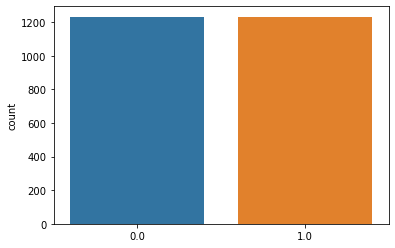

In [49]:
#visualisation by countplot
sns.countplot(x=yo)

As we can see from the above visualisation no further dataimbalance observed. Now we have to split the data by train test split method.

In [50]:
#splitting using train test split method
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.2, random_state=41)

## scaling

In [51]:
#scaling by using min max scaler
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [52]:
#checking dimensions of X_train, X_test
print(X_train_sc.shape, X_test_sc.shape)

(1972, 38) (494, 38)


In [53]:
model = Sequential()
model.add(Dense(38, input_shape=(38,), activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 38)                1482      
_________________________________________________________________
dense_1 (Dense)              (None, 19)                741       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 180       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 2,413
Trainable params: 2,413
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(x=X_train_sc, y=y_train, epochs=50, validation_data=(X_test_sc, y_test))

Epoch 1/50
62/62 [==============================] - 6s 19ms/step - loss: 0.6512 - accuracy: 0.6420 - val_loss: 0.5936 - val_accuracy: 0.7368
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.5090 - accuracy: 0.7921 - val_loss: 0.4699 - val_accuracy: 0.7976
Epoch 3/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4023 - accuracy: 0.8291 - val_loss: 0.4170 - val_accuracy: 0.8219
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 0.3566 - accuracy: 0.8463 - val_loss: 0.3957 - val_accuracy: 0.8239
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.3316 - accuracy: 0.8661 - val_loss: 0.3835 - val_accuracy: 0.8381
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.8697 - val_loss: 0.3752 - val_accuracy: 0.8421
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.8727 - val_loss: 0.4347 - val_accuracy: 0.7955
Epoch 8/50
62/62 [=

### Data loss

<AxesSubplot:>

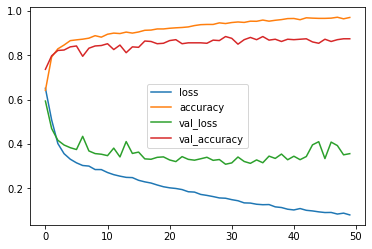

In [56]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [57]:
#model prediction by using confusion matrix and printing classification report
pred = model.predict(X_test_sc)
pred = np.where(pred>0.5, 1, 0)
c_m = confusion_matrix(y_test, pred)
print(c_m)
print(classification_report(y_test, pred))

[[198  38]
 [ 24 234]]
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       236
         1.0       0.86      0.91      0.88       258

    accuracy                           0.87       494
   macro avg       0.88      0.87      0.87       494
weighted avg       0.88      0.87      0.87       494



## Saving the model:

In [58]:
filename ="HR_Analytics_project.pkl"  #saving the model as a pickle
pickle.dump(pred, open(filename, 'wb')) 